# Identifying Fraud From Enron Data

### Udacity Nanodegree Project 4

####By Joe Nyzio 

# 2. Understanding the Dataset and Question

Address the most important characteristics of the dataset and use these characteristics to inform analysis.  Include total number of data points, allocation across classes, and number of features.

##### Address the most important characteristics of the dataset and use the characteristics to inform analysis.  
- Total no. of data points
- allocation across classes (POI/non-POI)
-no. of features used

In [1]:
import numpy as np
import pandas as pd

In [2]:
#!/usr/bin/python

""" 
    starter code for exploring the Enron dataset (emails + finances) 
    loads up the dataset (pickled dict of dicts)

    the dataset has the form
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person
    you should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../data/final_project_dataset.pkl", "r"))

### How many data points (people) are in the dataset?

In [3]:
people = len(enron_data)
print "There are " + str(people) + " people in the dataset."

There are 146 people in the dataset.


### How many features are in the dataset?

In [4]:
features = len(enron_data['ALLEN PHILLIP K'])
print "There are " + str(features) + " features in the dataset."

There are 21 features in the dataset.


### How many poi's are in the dataset?

In [5]:
def poi_counter(file):
    count = 0 
    for person in file:
        if file[person]['poi'] == True:
            count += 1
    print "There are " + str(count) + " poi's in the dataset."

poi_counter(enron_data)

There are 18 poi's in the dataset.


In [6]:
ofile = open('../data/poi_names.txt','r')
rfile = ofile.readlines()
poi = len(rfile[2:])
print "There were " + str(poi) + " poi's total."

There were 35 poi's total.


### A quick look at the data

In [7]:
df = pd.DataFrame(enron_data)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


In [10]:
df.dtypes

ALLEN PHILLIP K         object
BADUM JAMES P           object
BANNANTINE JAMES M      object
BAXTER JOHN C           object
BAY FRANKLIN R          object
BAZELIDES PHILIP J      object
BECK SALLY W            object
BELDEN TIMOTHY N        object
BELFER ROBERT           object
BERBERIAN DAVID         object
BERGSIEKER RICHARD P    object
BHATNAGAR SANJAY        object
BIBI PHILIPPE A         object
BLACHMAN JEREMY M       object
BLAKE JR. NORMAN P      object
...
UMANOFF ADAM S           object
URQUHART JOHN A          object
WAKEHAM JOHN             object
WALLS JR ROBERT H        object
WALTERS GARETH W         object
WASAFF GEORGE            object
WESTFAHL RICHARD K       object
WHALEY DAVID A           object
WHALLEY LAWRENCE G       object
WHITE JR THOMAS E        object
WINOKUR JR. HERBERT S    object
WODRASKA JOHN            object
WROBEL BRUCE             object
YEAGER F SCOTT           object
YEAP SOON                object
Length: 146, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, bonus to total_stock_value
Columns: 146 entries, ALLEN PHILLIP K to YEAP SOON
dtypes: object(146)

In [12]:
tdf = df.transpose()

In [13]:
tdf.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


## 2.2 Outlier Investigation (related mini-project : Lesson 7)

Identify outliers in the financial data, and explain how they are removed or otherwise handled.

### POI Outliers

In [14]:
%pylab inline
from sklearn import linear_model
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


97343619.0


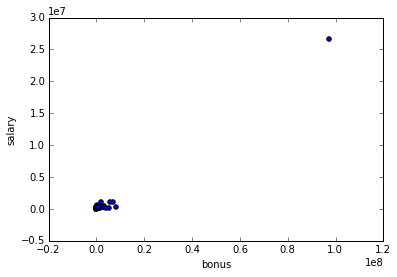

In [15]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../data/final_project_dataset.pkl", "r") )
features = ["bonus", "salary"]
data = featureFormat(data_dict, features)


### your code below
print data.max()
for point in data:
    bonus = point[0]
    salary = point[1]
    matplotlib.pyplot.scatter( bonus, salary )

matplotlib.pyplot.xlabel("bonus")
matplotlib.pyplot.ylabel("salary")
matplotlib.pyplot.show()

There is one major outlier in this dataset.

In [16]:
b_outliers = []
for key in data_dict:
    val = data_dict[key]['bonus']
    if val == 'NaN':
        continue
    b_outliers.append((key,int(val)))

pprint(sorted(b_outliers,key=lambda x:x[1],reverse=True)[:2])

[('TOTAL', 97343619), ('LAVORATO JOHN J', 8000000)]


In [17]:
s_outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    s_outliers.append((key,int(val)))

pprint(sorted(s_outliers,key=lambda x:x[1],reverse=True)[:2])

[('TOTAL', 26704229), ('SKILLING JEFFREY K', 1111258)]


We have a 'TOTAL' column as the major outlier in this dataset.  This will change our results and needs to be removed.  The other outlier is JEFFREY SKILLING.  This is not a mistake or unwanted point.  It is the boss and will definitely be an important point to keep in our investigation.

8000000.0


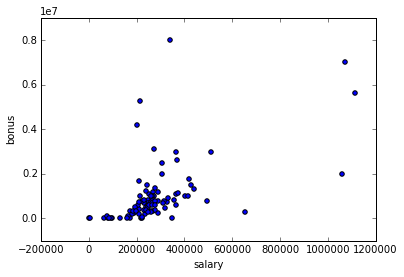

In [18]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../data/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

data_dict.pop('TOTAL',0)

data = featureFormat(data_dict, features)


### your code below
print data.max()
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We also need to investigate the variables 'from_poi_to_this_person' and 'from_this_person_to_poi'.

609.0


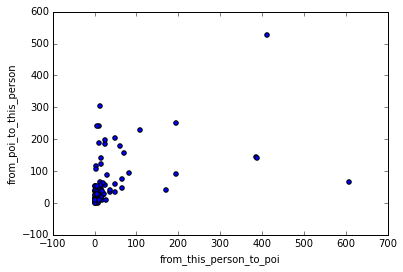

In [19]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../data/final_project_dataset.pkl", "r") )
features = ["from_this_person_to_poi", "from_poi_to_this_person"]
data = featureFormat(data_dict, features)


### your code below
print data.max()
for point in data:
    from_this_person_to_poi = point[0]
    from_poi_to_this_person = point[1]
    matplotlib.pyplot.scatter( from_this_person_to_poi, from_poi_to_this_person )

matplotlib.pyplot.xlabel("from_this_person_to_poi")
matplotlib.pyplot.ylabel("from_poi_to_this_person")
matplotlib.pyplot.show()

A few outliers, 2 major ones, who are they?

In [20]:
to_poi_outliers = []
for key in data_dict:
    val = data_dict[key]['from_this_person_to_poi']
    if val == 'NaN':
        continue
    to_poi_outliers.append((key,int(val)))

pprint(sorted(to_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('DELAINEY DAVID W', 609), ('LAVORATO JOHN J', 411)]


These are actual people, not mistakes, likely bosses placed in charge of communications, I'll keep these outliers.

In [21]:
from_poi_outliers = []
for key in data_dict:
    val = data_dict[key]['from_poi_to_this_person']
    if val == 'NaN':
        continue
    from_poi_outliers.append((key,int(val)))

pprint(sorted(from_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 528), ('DIETRICH JANET R', 305)]


These are also people in the dataset and will be important for identifying POI's.  Looks like LAVORATO JOHN J is a big deal in communications throughout Enron.  Bet he made a big bonus for his efforts.

I'm just going to check out bonus and salary for these top communicators to see if they appear relevant.

### Jon

In [22]:
enron_data['LAVORATO JOHN J']['bonus']

8000000

In [23]:
enron_data['LAVORATO JOHN J']['salary']

339288

### Janet

In [24]:
enron_data['DIETRICH JANET R']['bonus']

600000

In [25]:
enron_data['DIETRICH JANET R']['salary']

250100

### Dave

In [26]:
enron_data['DELAINEY DAVID W']['bonus']

3000000

In [27]:
enron_data['DELAINEY DAVID W']['salary']

365163

I'll only be removing 'TOTAL' for my final file.  I will use the following function to do this.

In [28]:
%%writefile ../tools/remove_outlier.py

def remove_outlier(dict_object, keys):
    """ removes a list of keys from a dict object """
    for key in keys:
        dict_object.pop(key, 0)

Overwriting ../tools/remove_outlier.py


# 3. Optimize Feature Selection/Engineering

### 3.1 Create new features (related mini-project: Lesson 11)

My new feature is an attempt to reduce of a persons contact information to single variable.  I want this variable to be the ratio between the workers emails to poi's and non poi's. 

In [29]:
%%writefile poi_ratio.py

def add_poi_ratio(data_dict, features_list):
    
    values = ['from_poi_to_this_person', 
              'from_this_person_to_poi',
              'to_messages', 
              'from_messages']
    
    for record in data_dict:
        person = data_dict[record]
        valid = True
        for value in values:
            if person[value] == 'NaN':
                valid = False
                
        if valid:
            poi = person['from_poi_to_this_person'] +\
                  person['from_this_person_to_poi']
            total = person['to_messages'] +\
                    person['from_messages']

            person['poi_ratio'] = float(poi) / total
        else:
            person['poi_ratio'] = 'NaN'
    features_list += ['poi_ratio']

Overwriting poi_ratio.py


## 3.2 Intelligently select features (related mini-project : Lesson 11)

My features were chosen the best results from the comparison of hand picked combinations.

In [30]:
#Feature options cheat sheet

#bonus                     
#deferral_payments       
#eferred_income            
#director_fees              
#email_address               
#exercised_stock_options    
#expenses                    
#from_messages        
#from_poi_to_this_person     
#from_this_person_to_poi  
#loan_advances                
#long_term_incentive          
#other                        
#poi                        
#restricted_stock            
#restricted_stock_deferred    
#salary                       
#shared_receipt_with_poi     
#to_messages                  
#total_payments               
#total_stock_value            

features_list1 = ['poi', 
                 'salary', 
                 'bonus'] #1 

features_list2 = ['poi', 
                 'salary', 
                 'bonus', 
                 'from_this_person_to_poi'] #2

features_list3 = ['poi', 
                  'salary', 
                  'from_poi_to_this_person', 
                  'from_this_person_to_poi'] #3

features_list4 = ['poi',
                  'from_this_person_to_poi', 
                  'from_poi_to_this_person', 
                  'shared_receipt_with_poi'] #4

features_list5 = ['poi',
                  'from_this_person_to_poi'] #5

#Gaussian test
#1 = Accuracy: 0.24480	Precision: 0.18368	Recall: 0.80600
#2 = Accuracy: 0.23282	Precision: 0.15703	Recall: 0.73700
#3 = Accuracy: 0.58418	Precision: 0.16291	Recall: 0.31100
#4 = Accuracy: 0.71678	Precision: 0.01757	Recall: 0.00500
#5 = Accuracy: 0.63971	Precision: 0.12392	Recall: 0.04300	F1: 0.06385

#4 = highest accuracy, try different classifier tunes to improve precision and recall

## 3.3 Properly scale features (related mini-project Lessons 1-3)

See response questions.  Question 2/Scaling Features

# 4 Pick and tune an Algorithm (related mini-project Lesson 2,3,13)

## 4.1 Pick an algorithm (related to mini project Lessons 1-3)

Below is the process I went through while picking and tuning the algorithm.  

In [31]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

#from sklearn.naive_bayes import GaussianNB
#from sklearn import tree

#clf = GaussianNB() 
#4 = Accuracy: 0.71678	Precision: 0.01757	Recall: 0.00500
#clf = sklearn.tree.DecisionTreeClassifier()
#Accuracy: 0.73856	Precision: 0.39827	Recall: 0.34550

#Decision tree showing immediate gains in all categories over GaussianNB.  
#Will use for tuning

## 4.2 Tune the algorithm (related to mini project Lessons 2,3,13)

In [32]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script.
### Because of the small size of the dataset, the script uses stratified
### shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

#clf = sklearn.tree.DecisionTreeClassifier(max_depth = 1) #1                       
#Accuracy: 0.81478	Precision: 0.93701	Recall: 0.17850  
#clf = sklearn.tree.DecisionTreeClassifier(max_depth = 5) #2
# Accuracy: 0.73078	Precision: 0.37174	Recall: 0.30650
#clf = sklearn.tree.DecisionTreeClassifier(max_depth = 10) #3
#Accuracy: 0.73756	Precision: 0.39716	Recall: 0.34950
#clf = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy') #4
#Accuracy: 0.73989	Precision: 0.40606	Recall: 0.36850
#clf = sklearn.tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 1) #5
#Accuracy: 0.81222	Precision: 0.93296	Recall: 0.16700
#clf = sklearn.tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 10) #6
#Accuracy: 0.74000	Precision: 0.40207	Recall: 0.34900
#clf = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=5) #7
#Accuracy: 0.72878	Precision: 0.38036	Recall: 0.35050   
#clf = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=2) #8
#Accuracy: 0.73822	Precision: 0.38648	Recall: 0.30300

#Little improvement from #6 but consistently better without too much complexity
#Favorite is #5 but doesn't meet .3 recall. Use #5 


#5. Validate and Evaluate


See response question #6.

##1. My final poi_id.py file (playground solution)

In [33]:
import sys
import pickle
from copy import copy
sys.path.append("../tools/")
import pickle

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data
import sklearn
import remove_outlier

import evaluate

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from feature_format import featureFormat
from feature_format import targetFeatureSplit

import poi_ratio



features_list = [
    'from_messages',
    'from_poi_to_this_person',
    'from_this_person_to_poi',
    'shared_receipt_with_poi',
    'to_messages',
    'bonus',
    'deferral_payments',
    'deferred_income',
    'director_fees',
    'exercised_stock_options',
    'expenses',
    'loan_advances',
    'long_term_incentive',
    'other',
    'restricted_stock',
    'restricted_stock_deferred',
    'salary',
    'total_payments',
    'total_stock_value',
    ]


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

#features_list = ['poi', 'salary', 'bonus'] #1 
#features_list = ['poi', 'salary', 'bonus', 'from_this_person_to_poi'] #2
#features_list = ['poi', 'salary', 'from_poi_to_this_person', 'from_this_person_to_poi'] #3
features_list = ['poi','from_this_person_to_poi', 'from_poi_to_this_person', 'shared_receipt_with_poi'] #4
#features_list = ['poi','from_this_person_to_poi'] #5

### Load the dictionary containing the dataset
data_dict = pickle.load(open("../data/final_project_dataset.pkl", "r") )

### Task 2: Remove outliers
outliers = ['TOTAL']
remove_outlier.remove_outlier(data_dict, outliers)


### Task 3: Create new feature(s)
#Make Copies
my_dataset = copy(data_dict)
features_list = copy(features_list)

# add new features
poi_ratio.add_poi_ratio(my_dataset, features_list)

#Used gaussianNB to quickly determine features with highest accuracy


#Gaussian test
#1 = Accuracy: 0.24480	Precision: 0.18368	Recall: 0.80600
#2 = Accuracy: 0.23282	Precision: 0.15703	Recall: 0.73700
#3 = Accuracy: 0.58418	Precision: 0.16291	Recall: 0.31100
#4 = Accuracy: 0.71678	Precision: 0.01757	Recall: 0.00500
#5 = Accuracy: 0.63971	Precision: 0.12392	Recall: 0.04300	F1: 0.06385

#4 = highest accuracy, try different classifier tunes to improve precision and recall

#Print features
print "{0} selected features: {1}\n".format(len(features_list) - 1, features_list[1:])


### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.

#clf = GaussianNB() 
#4 = Accuracy: 0.71678	Precision: 0.01757	Recall: 0.00500 <-excludes made up feature
#5 = Accuracy: 0.71489	Precision: 0.02833	Recall: 0.00850 <- includes made up feature
clf = sklearn.tree.DecisionTreeClassifier()
#Accuracy: 0.73856	Precision: 0.39827	Recall: 0.34550

#Decision tree showing immediate gains in all categories over GaussianNB.  
#Will use for tuning

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script.

#clf = sklearn.tree.DecisionTreeClassifier(max_depth = 1) #1                       
#Accuracy: 0.81478	Precision: 0.93701	Recall: 0.17850

#clf = sklearn.tree.DecisionTreeClassifier(max_depth = 5) #2
# Accuracy: 0.77133	Precision: 0.48155	Recall: 0.37850

#clf = sklearn.tree.DecisionTreeClassifier(max_depth = 10) #3
#Accuracy: 0.75467	Precision: 0.44439	Recall: 0.41550

#clf = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy') #4
#Accuracy: 0.76611	Precision: 0.47042	Recall: 0.41750

#clf = sklearn.tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 1) #5
#Accuracy: 0.81222	Precision: 0.93296	Recall: 0.16700

#clf = sklearn.tree.DecisionTreeClassifier(criterion ='entropy',max_depth = 10) #6
#Accuracy: 0.76800	Precision: 0.47511	Recall: 0.42000

#clf = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=5) #7
#Accuracy: 0.76378	Precision: 0.46106	Recall: 0.37300

clf = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=2) #8
#Accuracy: 0.78322	Precision: 0.51510	Recall: 0.41800

#Most all models meet requirements but I will use #8 as my final model

test_classifier(clf, my_dataset, features_list)

### Dump your classifier, dataset, and features_list so 
### anyone can run/check your results.

dump_classifier_and_data(clf, my_dataset, features_list)

4 selected features: ['from_this_person_to_poi', 'from_poi_to_this_person', 'shared_receipt_with_poi', 'poi_ratio']

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=2, min_samples_split=2,
            random_state=None, splitter='best')
	Accuracy: 0.77967	Precision: 0.50516	Recall: 0.41600	F1: 0.45627	F2: 0.43122
	Total predictions: 9000	True positives:  832	False positives:  815	False negatives: 1168	True negatives: 6185

